# Demo: Computation Graph Data Generation Model

In [1]:
import networkx as nx
from computation_graph_dgm import ComputationGraphDGM, draw_topological_order
import string

In [2]:
var_vocab = list(string.ascii_lowercase) # letters a-z
function_map = {'sum': sum}
mod_val = 16

dgm = ComputationGraphDGM(var_vocab=var_vocab, function_map=function_map, mod_val=mod_val)

In [3]:
example = dgm.sample_example(n_vars=5, func_degree=2, query_var='random', verbose=True)

topological order of variables in DAG: ['b', 'r', 't', 'x', 'y']
b <- 12
r <- 15
t <- sum(r, b)
x <- sum(t, b)
y <- sum(b, r)

prompt: 12 -> b <eq_sep> 15 -> r <eq_sep> sum ( r , b ) -> t <eq_sep> sum ( t , b ) -> x <eq_sep> sum ( b , r ) -> y <eq_sep>

Solving computation graph...
initializing node values:
{'12': 12, 'b': None, '15': 15, 'r': None, 't': None, 'x': None, 'y': None}

now iterating in topological order and solving for the value of each node...

Children(b) = ['12=12']
b <- leafValueAssignment([12]) = 12

Children(r) = ['15=15']
r <- leafValueAssignment([15]) = 15

Children(t) = ['r=15', 'b=12']
t <- sum([15, 12]) = 27

Children(x) = ['t=27', 'b=12']
x <- sum([27, 12]) = 39

Children(y) = ['b=12', 'r=15']
y <- sum([12, 15]) = 27

12 -> b <eq_sep> 15 -> r <eq_sep> sum ( r , b ) -> t <eq_sep> sum ( t , b ) -> x <eq_sep> sum ( b , r ) -> y <eq_sep> <query> y <answer> 27


In [4]:
for k, v in example.items():
    print(k)
    print(v)
    print()

prompt
['12', '->', 'b', '<eq_sep>', '15', '->', 'r', '<eq_sep>', 'sum', '(', 'r', ',', 'b', ')', '->', 't', '<eq_sep>', 'sum', '(', 't', ',', 'b', ')', '->', 'x', '<eq_sep>', 'sum', '(', 'b', ',', 'r', ')', '->', 'y', '<eq_sep>']

edges
[('12', 'b'), ('15', 'r'), ('r', 't'), ('b', 't'), ('t', 'x'), ('b', 'x'), ('b', 'y'), ('r', 'y')]

func_annotations
{'b': 'leafValueAssignment', 'r': 'leafValueAssignment', 't': 'sum', 'x': 'sum', 'y': 'sum'}

var_top_order
['b', 'r', 't', 'x', 'y']

node_vals
{'12': 12, 'b': 12, '15': 15, 'r': 15, 't': 27, 'x': 39, 'y': 27}

query_var
y

query_prompt
['12', '->', 'b', '<eq_sep>', '15', '->', 'r', '<eq_sep>', 'sum', '(', 'r', ',', 'b', ')', '->', 't', '<eq_sep>', 'sum', '(', 't', ',', 'b', ')', '->', 'x', '<eq_sep>', 'sum', '(', 'b', ',', 'r', ')', '->', 'y', '<eq_sep>', '<query>', 'y', '<answer>', '27']

tokenized_query_prompt
[38, 46, 1, 49, 41, 46, 17, 49, 42, 44, 17, 43, 1, 45, 46, 19, 49, 42, 44, 19, 43, 1, 45, 46, 23, 49, 42, 44, 1, 43, 17, 45, 

is DAG: True


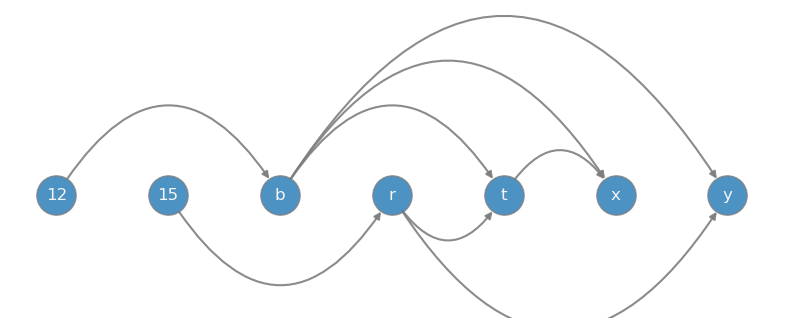

In [5]:
G = nx.from_edgelist(example['edges'], create_using=nx.DiGraph)
nx.set_node_attributes(G, example['func_annotations'], 'func')
print(f'is DAG: {nx.is_directed_acyclic_graph(G)}')

draw_topological_order(example, numeric_vocab=dgm.numeric_vocab, figsize=(10, 4));

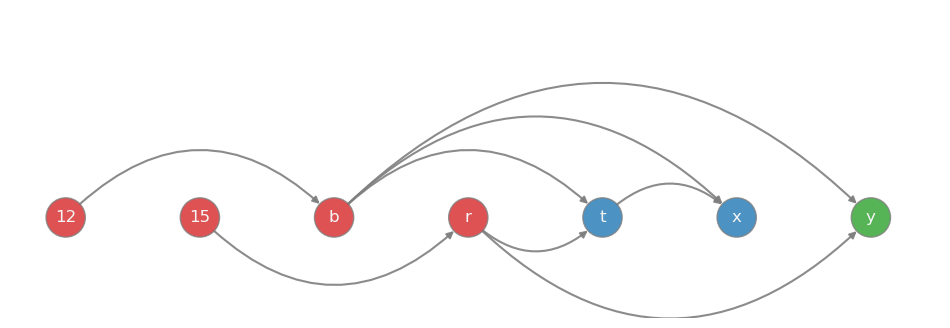

In [6]:
draw_topological_order(example, numeric_vocab=dgm.numeric_vocab, figsize=(12, 4), query_node=example['query_var'], rad=-0.5);